# Objective- To predict whether a customer is going to churn or not.

* The dataset contains realworld data of the customers using Telecom services (both calling and data).
* The telecom company wants to segregate high value customers(usage based) and require information whether they are going      to leave their services or not.
* They also want to know the factors responsible for the high value customers to leave their services.

In [1]:
#import libraries
import pandas as pd
import numpy as np

In [2]:
data=pd.read_csv(r'C:\Users\Asus\Teclov_assigment\telecom_churn_data.csv')

In [3]:
from IPython.core.display import HTML
HTML(data.head().to_html())
print(data.shape)

(99999, 226)


In [4]:
from IPython.core.display import HTML
HTML(data.isnull().sum().to_frame().to_html())

,0
mobile_number,0
circle_id,0
loc_og_t2o_mou,1018
std_og_t2o_mou,1018
loc_ic_t2o_mou,1018
last_date_of_month_6,0
last_date_of_month_7,601
last_date_of_month_8,1100
last_date_of_month_9,1659
arpu_6,0


In [5]:
HTML(pd.DataFrame(round(100*(data.isnull().sum()/len(data.index)), 2)).to_html())

,0
mobile_number,0.00
circle_id,0.00
loc_og_t2o_mou,1.02
std_og_t2o_mou,1.02
loc_ic_t2o_mou,1.02
last_date_of_month_6,0.00
last_date_of_month_7,0.60
last_date_of_month_8,1.10
last_date_of_month_9,1.66
arpu_6,0.00


In [6]:
#data.dropna(subset=['loc_og_t2o_mou'],inplace=True)
#print(data.shape)

In [7]:
#HTML(pd.DataFrame(round(100*(data.isnull().sum()/len(data.index)), 2)).to_html())


## dropping columns with 74% missing data

In [8]:
data_new=data.drop(['fb_user_6','fb_user_7','fb_user_8','fb_user_9',
                    'night_pck_user_6','night_pck_user_7','night_pck_user_8','night_pck_user_9',
                    'circle_id','loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou','arpu_3g_6','arpu_3g_7',
                    'arpu_3g_8','arpu_2g_6','arpu_2g_7','arpu_2g_8','date_of_last_rech_data_6','date_of_last_rech_data_7',
                    'date_of_last_rech_data_8','total_rech_data_6','total_rech_data_7','total_rech_data_8',
                    'max_rech_data_6','max_rech_data_7','max_rech_data_8',
                    'count_rech_2g_6','count_rech_2g_7','count_rech_2g_8',
                    'count_rech_3g_6','count_rech_3g_7','count_rech_3g_8',
                    'av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8'
                    
                    
                   ],axis=1)

In [9]:
HTML(pd.DataFrame(round(100*(data_new.isnull().sum()/len(data_new.index)), 2)).to_html())

,0
mobile_number,0.00
last_date_of_month_6,0.00
last_date_of_month_7,0.60
last_date_of_month_8,1.10
last_date_of_month_9,1.66
arpu_6,0.00
arpu_7,0.00
arpu_8,0.00
arpu_9,0.00
onnet_mou_6,3.94


## Retaining columns to get high value customers

In [10]:
good_phase=data_new[['mobile_number','total_rech_amt_6','total_rech_amt_7','total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']]

## Avg of recharge amount of first 2 months-good phase of customers.
* To get high value customers - It is required to retain those customers whose recharge amount is better in good phase.
* Customers with high average recharge amount[greater than 70th percentile of avg] are termed as high value customers

In [11]:
good_phase['Avg']=(good_phase['total_rech_amt_6']+good_phase['total_rech_amt_7'])/2

C:\Users\Asus\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [12]:
good_phase.head()

,mobile_number,total_rech_amt_6,total_rech_amt_7,total_ic_mou_9,total_og_mou_9,vol_2g_mb_9,vol_3g_mb_9,Avg
0,7000842753,362,252,0.00,0.00,0.0,0.00,307.0
1,7001865778,74,384,188.04,72.11,0.0,0.00,229.0
2,7001625959,168,315,517.74,124.94,0.0,8.42,241.5
3,7001204172,230,310,305.38,362.54,0.0,0.00,270.0
4,7000142493,196,350,205.31,104.59,0.0,0.00,273.0


In [13]:
good_phase.sort_values("Avg", axis = 0, ascending = True, 
                inplace = True, na_position ='last')

C:\Users\Asus\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [14]:
X=good_phase['Avg'].quantile(0.70)

In [15]:
X

368.5

In [16]:
high_value=good_phase.loc[good_phase['Avg'] > X]

In [17]:
high_value.shape

(29979, 8)

In [18]:
high_value.head()

,mobile_number,total_rech_amt_6,total_rech_amt_7,total_ic_mou_9,total_og_mou_9,vol_2g_mb_9,vol_3g_mb_9,Avg
79612,7001550177,514,224,251.69,61.36,15.84,281.91,369.0
68211,7001698050,358,380,278.28,220.53,0.00,0.00,369.0
87528,7002091529,250,488,53.98,79.03,0.00,0.00,369.0
72040,7000428679,0,738,0.26,0.21,0.00,0.00,369.0
46144,7000572677,374,364,409.43,359.94,745.65,63.12,369.0


## Tagging churn customers
* Churn customers are customers that have left the services.
* Customers churning possibility is high mainly in 4th month.
* The first 2 months are termed to be good phase,the 3rd month is action phase and the last month is churn phase.
* So the churn customers are tagged based on the attributes(incoming,outgoing,2g,3g data) of last or 4th month.

In [19]:
high_value['label']=0

C:\Users\Asus\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [20]:
high_value['label']=np.where((high_value['total_ic_mou_9']==0) & (high_value['total_og_mou_9']==0)
                    & (high_value['vol_2g_mb_9']==0) & (high_value['vol_3g_mb_9']==0),1,high_value['label'])

C:\Users\Asus\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [21]:
high_value['label'].value_counts()/len(high_value['label'])

0    0.91364
1    0.08636
Name: label, dtype: float64

In [22]:
high_value=high_value[['mobile_number','label']]

In [23]:
high_value.shape

(29979, 2)

In [24]:
main=pd.merge(high_value,data_new,on='mobile_number')

In [25]:
main.head()

,mobile_number,label,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,...,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7001550177,0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,454.229,196.729,60.098,186.871,...,1,0,0,0,0,3606,333.93,726.81,390.22,0.0
1,7001698050,0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,321.011,218.311,248.925,175.449,...,0,0,0,0,0,404,0.00,0.00,0.00,0.0
2,7002091529,0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,254.526,304.756,250.370,90.627,...,0,0,0,0,0,261,0.00,0.00,0.00,0.0
3,7000428679,0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,5.500,633.058,0.000,0.000,...,0,0,0,0,0,728,0.00,0.00,0.00,0.0
4,7000572677,0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,226.941,369.021,565.869,513.484,...,0,0,0,0,0,389,179.52,0.00,0.00,0.0


In [26]:
main.drop(main.columns[main.columns.str.contains('_9')], axis=1, inplace=True)

In [27]:
main.shape

(29979, 139)

In [28]:

main.head()

,mobile_number,label,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,...,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7001550177,0,6/30/2014,7/31/2014,8/31/2014,454.229,196.729,60.098,62.04,14.69,...,0,0,0,0,0,3606,333.93,726.81,390.22,0.0
1,7001698050,0,6/30/2014,7/31/2014,8/31/2014,321.011,218.311,248.925,110.04,54.61,...,0,0,0,0,0,404,0.00,0.00,0.00,0.0
2,7002091529,0,6/30/2014,7/31/2014,8/31/2014,254.526,304.756,250.370,76.26,144.81,...,0,0,0,0,0,261,0.00,0.00,0.00,0.0
3,7000428679,0,6/30/2014,7/31/2014,8/31/2014,5.500,633.058,0.000,0.00,357.74,...,0,0,0,0,0,728,0.00,0.00,0.00,0.0
4,7000572677,0,6/30/2014,7/31/2014,8/31/2014,226.941,369.021,565.869,2.89,20.43,...,0,0,0,0,0,389,179.52,0.00,0.00,0.0


In [29]:
HTML(pd.DataFrame(round(100*(main.isnull().sum()/len(main.index)), 2)).to_html())

,0
mobile_number,0.00
label,0.00
last_date_of_month_6,0.00
last_date_of_month_7,0.10
last_date_of_month_8,0.52
arpu_6,0.00
arpu_7,0.00
arpu_8,0.00
onnet_mou_6,1.05
onnet_mou_7,1.01


## Without 74% missing data

In [30]:
HTML(main.isnull().sum().to_frame().to_html())

,0
mobile_number,0
label,0
last_date_of_month_6,0
last_date_of_month_7,31
last_date_of_month_8,157
arpu_6,0
arpu_7,0
arpu_8,0
onnet_mou_6,316
onnet_mou_7,303


In [31]:
main.dropna(subset=['onnet_mou_8','onnet_mou_6','onnet_mou_7','date_of_last_rech_8','date_of_last_rech_7','date_of_last_rech_6'],inplace=True)

In [32]:
HTML(main.isnull().sum().to_frame().to_html())

,0
mobile_number,0
label,0
last_date_of_month_6,0
last_date_of_month_7,0
last_date_of_month_8,0
arpu_6,0
arpu_7,0
arpu_8,0
onnet_mou_6,0
onnet_mou_7,0


In [33]:
main.shape

(28455, 139)

In [34]:
29979-28455

1524

In [35]:
28455/29979

0.9491644150905634

In [36]:
main.head()

,mobile_number,label,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,...,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7001550177,0,6/30/2014,7/31/2014,8/31/2014,454.229,196.729,60.098,62.04,14.69,...,0,0,0,0,0,3606,333.93,726.81,390.22,0.0
1,7001698050,0,6/30/2014,7/31/2014,8/31/2014,321.011,218.311,248.925,110.04,54.61,...,0,0,0,0,0,404,0.00,0.00,0.00,0.0
2,7002091529,0,6/30/2014,7/31/2014,8/31/2014,254.526,304.756,250.370,76.26,144.81,...,0,0,0,0,0,261,0.00,0.00,0.00,0.0
3,7000428679,0,6/30/2014,7/31/2014,8/31/2014,5.500,633.058,0.000,0.00,357.74,...,0,0,0,0,0,728,0.00,0.00,0.00,0.0
4,7000572677,0,6/30/2014,7/31/2014,8/31/2014,226.941,369.021,565.869,2.89,20.43,...,0,0,0,0,0,389,179.52,0.00,0.00,0.0


In [37]:
main['label'].value_counts()/len(main['label'])

0    0.938535
1    0.061465
Name: label, dtype: float64

In [38]:
26706/28455

0.9385345282024249

In [39]:
1749/28829

0.06066807728329113

In [40]:
HTML(main.head().to_html())


,mobile_number,label,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7001550177,0,6/30/2014,7/31/2014,8/31/2014,454.229,196.729,60.098,62.04,14.69,7.43,197.51,34.29,39.83,0.00,11.38,0.00,0.00,5.86,0.0,5.56,12.29,5.88,13.49,25.49,36.86,0.0,0.0,0.00,0.00,0.00,0.00,19.06,37.79,42.74,56.48,0.00,1.55,184.01,5.33,0.00,0.0,0.0,0.00,0.0,0.0,0.0,240.49,5.33,1.55,0.0,0.0,0.0,0.00,0.00,2.96,0.00,0.0,0.0,259.56,43.13,47.26,0.28,18.76,20.45,23.56,41.31,59.66,9.31,17.23,7.18,33.16,77.31,87.29,13.68,4.00,14.39,100.29,15.04,10.26,0.00,4.05,11.01,0.0,0.0,0.0,113.98,23.09,35.68,147.14,100.41,122.98,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,10,7,2,514,224,100,154,154,50,6/30/2014,7/28/2014,8/25/2014,154,154,50,303.15,77.36,0.00,363.93,629.03,0.00,2,1,0,0,0,0,0,0,0,0,0,0,3606,333.93,726.81,390.22,0.0
1,7001698050,0,6/30/2014,7/31/2014,8/31/2014,321.011,218.311,248.925,110.04,54.61,49.11,331.23,271.74,249.64,0.00,0.00,0.00,0.00,0.00,0.0,110.04,54.61,49.11,330.26,271.74,248.56,0.0,0.0,0.00,0.00,0.00,0.00,440.31,326.36,297.68,0.00,0.00,0.00,0.96,0.00,0.00,0.0,0.0,1.08,0.0,0.0,0.0,0.96,0.00,1.08,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.3,441.28,326.36,299.06,43.38,13.01,7.93,321.39,307.91,308.28,0.00,0.00,0.83,364.78,320.93,317.04,0.00,0.36,0.00,0.00,0.00,0.10,11.24,10.83,1.49,0.0,0.0,0.0,11.24,11.19,1.59,376.54,334.26,318.88,0.00,0.0,0.0,0.0,0.00,0.06,0.51,2.13,0.16,5,5,4,358,380,300,128,110,130,6/26/2014,7/26/2014,8/26/2014,50,110,130,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,404,0.00,0.00,0.00,0.0
2,7002091529,0,6/30/2014,7/31/2014,8/31/2014,254.526,304.756,250.370,76.26,144.81,23.16,114.71,255.61,225.96,7.41,0.00,0.00,37.38,0.00,0.0,41.21,84.74,16.73,20.49,78.54,89.26,0.0,0.0,0.00,0.08,1.76,0.00,61.71,163.29,105.99,21.91,60.06,6.43,69.29,175.13,136.69,0.0,0.0,0.00,0.0,0.0,0.0,91.21,235.19,143.13,0.0,0.0,0.0,3.66,17.69,2.24,3.15,0.0,0.0,159.74,416.19,251.38,25.99,36.69,8.66,0.76,11.06,0.05,0.00,0.00,0.00,26.76,47.76,8.71,0.01,13.84,0.00,9.91,52.88,4.26,0.00,0.00,0.00,0.0,0.0,0.0,9.93,66.73,4.26,36.84,115.03

In [41]:
HTML(main.isnull().sum().to_frame().to_html())


,0
mobile_number,0
label,0
last_date_of_month_6,0
last_date_of_month_7,0
last_date_of_month_8,0
arpu_6,0
arpu_7,0
arpu_8,0
onnet_mou_6,0
onnet_mou_7,0


In [42]:
main.shape

(28455, 139)

last_date_of_month_6,date_of_last_rech_6
loc_og_mou_6,std_og_mou_6,total_og_mou_6,loc_ic_mou_6,std_ic_mou_7,total_ic_mou_6


In [43]:
main=main.drop(['last_date_of_month_6','last_date_of_month_7','last_date_of_month_8',
               'date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8',
               'std_og_t2c_mou_6','std_og_t2c_mou_7','std_og_t2c_mou_8',
               'std_ic_t2o_mou_6','std_ic_t2o_mou_7','std_ic_t2o_mou_8'],axis=1)

## Data standardization using formule

In [44]:
normalized_df=(main-main.min())/(main.max()-main.min())

In [45]:
normalized_df.head()

,mobile_number,label,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,...,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,0.642975,0.0,0.044317,0.022904,0.011958,0.008410,0.001801,0.000691,0.023619,0.003547,...,0.0,0.0,0.0,0.0,0.0,0.827336,0.025854,0.079298,0.034947,0.0
1,0.704312,0.0,0.039650,0.023507,0.017530,0.014917,0.006694,0.004567,0.039610,0.028110,...,0.0,0.0,0.0,0.0,0.0,0.054093,0.000000,0.000000,0.000000,0.0
2,0.867525,0.0,0.037320,0.025924,0.017572,0.010338,0.017751,0.002154,0.013717,0.026441,...,0.0,0.0,0.0,0.0,0.0,0.019560,0.000000,0.000000,0.000000,0.0
3,0.177783,0.0,0.028595,0.035103,0.010184,0.000000,0.043853,0.000000,0.000298,0.037804,...,0.0,0.0,0.0,0.0,0.0,0.132335,0.000000,0.000000,0.000000,0.0
4,0.237513,0.0,0.036354,0.027721,0.026882,0.000392,0.002504,0.001938,0.005607,0.020288,...,0.0,0.0,0.0,0.0,0.0,0.050471,0.013899,0.000000,0.000000,0.0


In [46]:
HTML(normalized_df.isnull().sum().to_frame().to_html())

,0
mobile_number,0
label,0
arpu_6,0
arpu_7,0
arpu_8,0
onnet_mou_6,0
onnet_mou_7,0
onnet_mou_8,0
offnet_mou_6,0
offnet_mou_7,0


In [47]:
# Putting feature variable to X
x = normalized_df.drop(["mobile_number",'label'],axis=1)

# Putting response variable to y
y = normalized_df['label']

In [48]:
HTML(main.head().to_html())

,mobile_number,label,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7001550177,0,454.229,196.729,60.098,62.04,14.69,7.43,197.51,34.29,39.83,0.00,11.38,0.00,0.00,5.86,0.0,5.56,12.29,5.88,13.49,25.49,36.86,0.0,0.0,0.00,0.00,0.00,0.00,19.06,37.79,42.74,56.48,0.00,1.55,184.01,5.33,0.00,0.0,0.0,0.00,240.49,5.33,1.55,0.0,0.0,0.0,0.00,0.00,2.96,0.00,0.0,0.0,259.56,43.13,47.26,0.28,18.76,20.45,23.56,41.31,59.66,9.31,17.23,7.18,33.16,77.31,87.29,13.68,4.00,14.39,100.29,15.04,10.26,0.00,4.05,11.01,113.98,23.09,35.68,147.14,100.41,122.98,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,10,7,2,514,224,100,154,154,50,154,154,50,303.15,77.36,0.00,363.93,629.03,0.00,2,1,0,0,0,0,0,0,0,0,0,0,3606,333.93,726.81,390.22,0.0
1,7001698050,0,321.011,218.311,248.925,110.04,54.61,49.11,331.23,271.74,249.64,0.00,0.00,0.00,0.00,0.00,0.0,110.04,54.61,49.11,330.26,271.74,248.56,0.0,0.0,0.00,0.00,0.00,0.00,440.31,326.36,297.68,0.00,0.00,0.00,0.96,0.00,0.00,0.0,0.0,1.08,0.96,0.00,1.08,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.3,441.28,326.36,299.06,43.38,13.01,7.93,321.39,307.91,308.28,0.00,0.00,0.83,364.78,320.93,317.04,0.00,0.36,0.00,0.00,0.00,0.10,11.24,10.83,1.49,11.24,11.19,1.59,376.54,334.26,318.88,0.00,0.0,0.0,0.0,0.00,0.06,0.51,2.13,0.16,5,5,4,358,380,300,128,110,130,50,110,130,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,404,0.00,0.00,0.00,0.0
2,7002091529,0,254.526,304.756,250.370,76.26,144.81,23.16,114.71,255.61,225.96,7.41,0.00,0.00,37.38,0.00,0.0,41.21,84.74,16.73,20.49,78.54,89.26,0.0,0.0,0.00,0.08,1.76,0.00,61.71,163.29,105.99,21.91,60.06,6.43,69.29,175.13,136.69,0.0,0.0,0.00,91.21,235.19,143.13,0.0,0.0,0.0,3.66,17.69,2.24,3.15,0.0,0.0,159.74,416.19,251.38,25.99,36.69,8.66,0.76,11.06,0.05,0.00,0.00,0.00,26.76,47.76,8.71,0.01,13.84,0.00,9.91,52.88,4.26,0.00,0.00,0.00,9.93,66.73,4.26,36.84,115.03,12.98,0.15,0.0,0.0,0.0,0.00,0.00,0.00,0.53,0.00,5,8,3,250,488,228,90,128,128,50,128,50,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,261,0.00,0.00,0.00,0.0
3,7000428679,0,5.500,633.058,0.000,0.00,357.74,0.00,2.49,365.46,6.63,1.55,0.00,0.00,2.49,0.00,0.0,0.00,3.64,0.00,0.00,12.34,0.00,0.0,0.0,0.00,0.28,5.66,6.63,0.00,15.99,0.00,0.00,354.09,0.00,0.00,342.48,0.00,0.0,0.0,0.00,0.00,696.58,0.00,0.0,0.0,0.0,0.00,19.81,7.34,0.00,0.0,0.0,0.00

## Data is highly unbalance, performing oversampling to making it balance dataset.

In [49]:
from imblearn.over_sampling import (RandomOverSampler, 
                                    SMOTE, 
                                    ADASYN)


C:\Users\SUSHANT\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\SUSHANT\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.ensemble.bagging module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\SUSHANT\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.ensemble.base module is  deprecated in version 0.22 and will be remo

In [50]:
smp=RandomOverSampler(random_state=100)
X, Y = smp.fit_sample(x, y)


C:\Users\SUSHANT\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [51]:
print(x.shape)
print(y.shape)
print(X.shape)
print(Y.shape)


(28455, 125)
(28455,)
(53412, 125)
(53412,)


In [52]:
pd.DataFrame(Y,columns=['label']).value_counts()

label
1.0      26706
0.0      26706
dtype: int64

In [53]:
x.columns

Index(['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       'roam_ic_mou_6',
       ...
       'monthly_3g_7', 'monthly_3g_8', 'sachet_3g_6', 'sachet_3g_7',
       'sachet_3g_8', 'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g',
       'sep_vbc_3g'],
      dtype='object', length=125)

In [54]:
X=pd.DataFrame(X,columns=(x.columns))

In [55]:
X.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,0.044317,0.022904,0.011958,0.008410,0.001801,0.000691,0.023619,0.003547,0.002844,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.827336,0.025854,0.079298,0.034947,0.0
1,0.039650,0.023507,0.017530,0.014917,0.006694,0.004567,0.039610,0.028110,0.017822,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.054093,0.000000,0.000000,0.000000,0.0
2,0.037320,0.025924,0.017572,0.010338,0.017751,0.002154,0.013717,0.026441,0.016132,0.002835,...,0.0,0.0,0.0,0.0,0.0,0.019560,0.000000,0.000000,0.000000,0.0
3,0.028595,0.035103,0.010184,0.000000,0.043853,0.000000,0.000298,0.037804,0.000473,0.000593,...,0.0,0.0,0.0,0.0,0.0,0.132335,0.000000,0.000000,0.000000,0.0
4,0.036354,0.027721,0.026882,0.000392,0.002504,0.001938,0.005607,0.020288,0.014881,0.000750,...,0.0,0.0,0.0,0.0,0.0,0.050471,0.013899,0.000000,0.000000,0.0


In [56]:
print(dict(pd.Series(Y).value_counts()))

{1.0: 26706, 0.0: 26706}


In [57]:
# Splitting the data into train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y, train_size=0.7,test_size=0.3,random_state=100)

In [58]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

regressor = RandomForestClassifier(max_depth=4,n_estimators=100,random_state=1)# n_estimators means number tree we want
regressor.fit(x_train, y_train)

RandomForestClassifier(max_depth=4, random_state=1)

In [59]:
y_predict_r=regressor.predict(x_train)

In [60]:
y_predict_r.shape

(37388,)

In [61]:
y_train.shape

(37388,)

In [62]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_train, y_predict_r)
print(confusion_matrix)

[[16600  2092]
 [ 4451 14245]]


In [63]:
Accuracy_Train=((16600+14245)/(16600+14245+4451+2092)*100)
print(Accuracy_Train)

82.49973253450304


In [64]:
y_prediction_r=regressor.predict(x_test)

In [65]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_prediction_r)
print(confusion_matrix)

[[7084  930]
 [1926 6084]]


In [66]:
Accuracy_test=((7084+6084)/(7084+6084+1926+930)*100)
Accuracy_test

82.17673489765353

In [67]:
from sklearn.metrics import precision_score,recall_score,f1_score

In [68]:
print(precision_score(y_train, y_predict_r))
print(recall_score(y_train, y_predict_r))
print(f1_score(y_train, y_predict_r))

0.8719471139132031
0.7619276850663244
0.8132332372334655


In [69]:
print(precision_score(y_test, y_prediction_r))
print(recall_score(y_test, y_prediction_r))
print(f1_score(y_test, y_prediction_r))

0.8674080410607357
0.7595505617977528
0.8099041533546325


In [70]:
#test
print(7001/(7001+1013))
print(2160/(2160+5850))


0.8735962066383828
0.2696629213483146


In [71]:
print(16393/(16393+2299))
print(4967/(4967+13729))

0.877006205863471
0.26567180145485664


## Random forest is giving good accuracy to churn but we can't get the varibles that are use for prediction.

In [72]:
import statsmodels.formula.api as smf
import statsmodels.api as sm
x_1 =sm.add_constant(x_train)
b=sm.Logit(y_train,x_1)
result=b.fit()
print(result.summary2())



C:\Users\SUSHANT\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:49: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


         Current function value: 0.447565
         Iterations: 35


C:\Users\SUSHANT\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                                 Results: Logit
Model:                    Logit                 Pseudo R-squared:      0.354     
Dependent Variable:       y                     AIC:                   33719.1334
Date:                     2020-10-20 18:27      BIC:                   34793.8007
No. Observations:         37388                 Log-Likelihood:        -16734.   
Df Model:                 125                   LL-Null:               -25915.   
Df Residuals:             37262                 LLR p-value:           0.0000    
Converged:                0.0000                Scale:                 1.0000    
No. Iterations:           35.0000                                                
---------------------------------------------------------------------------------
                     Coef.     Std.Err.     z     P>|z|     [0.025       0.975]  
---------------------------------------------------------------------------------
const                 -0.5260     0.1875  -2.8057 


## Let's run the model using the selected variables
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logsk = LogisticRegression()
logsk.fit(X_train[col], y_train)

In [73]:
y_predict_log=result.predict(x_1)
y_predict_log

11778    0.894232
5736     0.295107
44903    0.930197
31622    0.686913
40722    0.906790
           ...   
16304    0.037760
79       0.008835
12119    0.016041
14147    0.053913
38408    0.769788
Length: 37388, dtype: float64

In [74]:
# Converting y_pred to a dataframe which is an array
y_predict_log = pd.DataFrame(y_predict_log,columns=['y_predict_log_prob'])

In [75]:
y_predict_log

,y_predict_log_prob
11778,0.894232
5736,0.295107
44903,0.930197
31622,0.686913
40722,0.906790
...,...
16304,0.037760
79,0.008835
12119,0.016041
14147,0.053913


In [76]:

y_predict_log['y_predict_log_class']=np.where((y_predict_log['y_predict_log_prob'] < 0.5) ,0 ,1)

In [77]:
y_predict_log.head()

,y_predict_log_prob,y_predict_log_class
11778,0.894232,1
5736,0.295107,0
44903,0.930197,1
31622,0.686913,1
40722,0.906790,1


In [78]:
y_predict_log['y_predict_log_class'].shape

(37388,)

In [79]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_train, y_predict_log['y_predict_log_class'])
print(confusion_matrix)

[[14898  3794]
 [ 3118 15578]]


In [80]:
Accuracy_Train=((14898+15578)/(14898+15578+3794+3118)*100)
print(Accuracy_Train)

81.51278485075424


In [81]:
y_predict_test_prob=result.predict((sm.add_constant(x_test)))
#y_prediction_r=regressor.predict(x_test)

In [82]:
y_pred_log_test = pd.DataFrame(y_predict_test_prob,columns=['y_predict_test_prob'])

In [83]:
y_pred_log_test.head()

,y_predict_test_prob
14921,0.244717
53262,0.541949
26182,0.022641
47325,0.293818
3954,0.275176


In [84]:
y_pred_log_test['y_predict_test_class']=np.where((y_pred_log_test['y_predict_test_prob'] < 0.5) ,0 ,1)

In [85]:
y_pred_log_test.head()

,y_predict_test_prob,y_predict_test_class
14921,0.244717,0
53262,0.541949,1
26182,0.022641,0
47325,0.293818,0
3954,0.275176,0


In [86]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred_log_test['y_predict_test_class'])
print(confusion_matrix)

[[6354 1660]
 [1447 6563]]


In [87]:
Accuracy_test=((6354+6563)/(6354+6563+1447+1660)*100)
print(Accuracy_test)

80.61033449825263


In [88]:
print(precision_score(y_train, y_predict_log['y_predict_log_class']))
print(recall_score(y_train, y_predict_log['y_predict_log_class']))
print(f1_score(y_train, y_predict_log['y_predict_log_class']))


0.8041503200495561
0.8332263585793752
0.8184301775769675


In [89]:
print(precision_score(y_test, y_pred_log_test['y_predict_test_class']))
print(recall_score(y_test, y_pred_log_test['y_predict_test_class']))
print(f1_score(y_test, y_pred_log_test['y_predict_test_class']))

0.798127204183388
0.8193508114856429
0.8085997659089509


In [90]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_log_test['y_predict_test_class']))

              precision    recall  f1-score   support

         0.0       0.81      0.79      0.80      8014
         1.0       0.80      0.82      0.81      8010

    accuracy                           0.81     16024
   macro avg       0.81      0.81      0.81     16024
weighted avg       0.81      0.81      0.81     16024



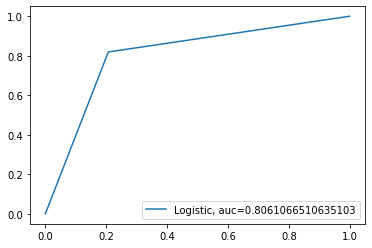

In [91]:
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
y_pred_proba = y_pred_log_test['y_predict_test_class']
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="Logistic, auc="+str(auc))
plt.legend(loc=4)
plt.show()

## VIF value

In [92]:
# UDF for calculating vif value
def vif_cal(input_data):
    vif_df = pd.DataFrame( columns = ['Var', 'Vif'])
    #x_vars=input_data.drop([dependent_col], axis=1)
    xvar_names=input_data.columns
    for i in range(0,xvar_names.shape[0]):
        y=input_data[xvar_names[i]] 
        x=input_data[xvar_names.drop(xvar_names[i])]
        rsq=sm.OLS(y,x).fit().rsquared  
        vif=round(1/(1-rsq),2)
        vif_df.loc[i] = [xvar_names[i], vif]
    return vif_df.sort_values(by = 'Vif', axis=0, ascending=False, inplace=False)

In [93]:
vif=vif_cal(input_data=X)
HTML(vif.to_html())

,Var,Vif
40,std_og_mou_7,5.486641e+10
39,std_og_mou_6,5.117407e+10
52,total_og_mou_7,3.413667e+10
41,std_og_mou_8,3.404570e+10
51,total_og_mou_6,2.762911e+10
53,total_og_mou_8,1.976351e+10
34,std_og_t2m_mou_7,1.561161e+10
33,std_og_t2m_mou_6,1.539740e+10
30,std_og_t2t_mou_6,1.453576e+10
31,std_og_t2t_mou_7,1.401606e+10


In [94]:
X.columns

Index(['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       'roam_ic_mou_6',
       ...
       'monthly_3g_7', 'monthly_3g_8', 'sachet_3g_6', 'sachet_3g_7',
       'sachet_3g_8', 'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g',
       'sep_vbc_3g'],
      dtype='object', length=125)

In [95]:
Y

array([0., 0., 0., ..., 1., 1., 1.])

## backward elimination method for Regression.

In [96]:
# Backward Elimination
cols = list(X.columns) # all columns present in X
pmax = 1
while (len(cols)>0): # count of variables should be greater than zero
    p=[]
    X_1 = X[cols] # all column we are assigning in X_1
    X_1 = sm.add_constant(X_1) # adding a column with vaue 1
    final_model = sm.Logit(Y,X_1).fit() # Regression model
    p = pd.Series(final_model.pvalues.values[1:], index=cols) # to get the p-values of all variables
    pmax = max(p) # select a max P-value
    feature_with_p_max = p.idxmax() # idmax is used to display the variable name which has max p-value
    if(pmax > 0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

         Current function value: 0.450798
         Iterations: 35


C:\Users\SUSHANT\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


         Current function value: 0.450798
         Iterations: 35


C:\Users\SUSHANT\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


         Current function value: 0.450798
         Iterations: 35


C:\Users\SUSHANT\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


         Current function value: 0.450798
         Iterations: 35


C:\Users\SUSHANT\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


         Current function value: 0.450798
         Iterations: 35


C:\Users\SUSHANT\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


         Current function value: 0.450797
         Iterations: 35


C:\Users\SUSHANT\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


         Current function value: 0.450795
         Iterations: 35


C:\Users\SUSHANT\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


         Current function value: 0.450794
         Iterations: 35


C:\Users\SUSHANT\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


         Current function value: 0.450792
         Iterations: 35


C:\Users\SUSHANT\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


         Current function value: 0.450778
         Iterations: 35


C:\Users\SUSHANT\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


         Current function value: 0.450772
         Iterations: 35


C:\Users\SUSHANT\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


         Current function value: 0.450757
         Iterations: 35


C:\Users\SUSHANT\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


         Current function value: 0.450743
         Iterations: 35


C:\Users\SUSHANT\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


         Current function value: 0.450731
         Iterations: 35


C:\Users\SUSHANT\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


         Current function value: 0.450731
         Iterations: 35


C:\Users\SUSHANT\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


         Current function value: 0.450710
         Iterations: 35


C:\Users\SUSHANT\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


         Current function value: 0.450643
         Iterations: 35


C:\Users\SUSHANT\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


         Current function value: 0.450644
         Iterations: 35


C:\Users\SUSHANT\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


         Current function value: 0.450585
         Iterations: 35


C:\Users\SUSHANT\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


         Current function value: 0.450511
         Iterations: 35


C:\Users\SUSHANT\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


         Current function value: 0.450511
         Iterations: 35


C:\Users\SUSHANT\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


         Current function value: 0.450513
         Iterations: 35


C:\Users\SUSHANT\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


         Current function value: 0.450515
         Iterations: 35


C:\Users\SUSHANT\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


         Current function value: 0.450519
         Iterations: 35


C:\Users\SUSHANT\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


         Current function value: 0.450523
         Iterations: 35


C:\Users\SUSHANT\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Optimization terminated successfully.
         Current function value: 0.450140
         Iterations 14
Optimization terminated successfully.
         Current function value: 0.450145
         Iterations 13
Optimization terminated successfully.
         Current function value: 0.450153
         Iterations 13
Optimization terminated successfully.
         Current function value: 0.450161
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.450162
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.450166
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.450178
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.450199
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.450221
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.450245

In [97]:
len(selected_features_BE)

88

In [98]:
len(selected_features_BE)
X.shape

(53412, 125)

## new model with selected features

In [99]:
new_x=X[selected_features_BE]


## Check vif

In [100]:

HTML((vif_cal(input_data=new_x)).to_html())

,Var,Vif
33,total_og_mou_6,28403.68
5,offnet_mou_6,12308.21
3,onnet_mou_6,10168.54
24,std_og_mou_6,3563.11
48,total_ic_mou_6,3091.79
50,total_ic_mou_8,2743.32
20,loc_og_mou_6,2305.41
40,loc_ic_mou_6,2021.60
36,loc_ic_t2m_mou_8,890.30
10,roam_og_mou_6,732.75


In [101]:
new_x=new_x.drop(['total_og_mou_6','total_ic_mou_6','total_ic_mou_8','total_ic_mou_7','std_og_mou_6','std_og_mou_7',
                  'loc_og_mou_6','total_rech_amt_6','total_rech_amt_7','total_rech_amt_8',
                 'offnet_mou_6','offnet_mou_7','arpu_6','arpu_7','arpu_8'],axis=1)

In [102]:
HTML((vif_cal(input_data=new_x)).to_html())


,Var,Vif
47,total_rech_num_7,8.28
20,isd_og_mou_8,7.27
1,onnet_mou_7,6.87
46,total_rech_num_6,6.46
11,loc_og_t2m_mou_7,5.70
18,isd_og_mou_6,5.28
8,loc_og_t2t_mou_7,5.25
12,loc_og_t2m_mou_8,5.23
19,isd_og_mou_7,5.23
48,total_rech_num_8,5.19


In [103]:
new_x.shape

(53412, 73)

In [104]:
y_train.shape

(37388,)

In [105]:
b=sm.Logit(Y,sm.add_constant(new_x))
result=b.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.460150
         Iterations 9
                            Results: Logit
Model:                 Logit             Pseudo R-squared:  0.336     
Dependent Variable:    y                 AIC:               49303.0210
Date:                  2020-10-20 18:33  BIC:               49960.5695
No. Observations:      53412             Log-Likelihood:    -24578.   
Df Model:              73                LL-Null:           -37022.   
Df Residuals:          53338             LLR p-value:       0.0000    
Converged:             1.0000            Scale:             1.0000    
No. Iterations:        9.0000                                         
----------------------------------------------------------------------
                    Coef.   Std.Err.    z     P>|z|   [0.025   0.975] 
----------------------------------------------------------------------
const                0.6589   0.0334  19.7029 0.0000   0.5934   0.7245
onn

In [106]:
# Backward Elimination
cols = list(new_x.columns) # all columns present in X
pmax = 1
while (len(cols)>0): # count of variables should be greater than zero
    p=[]
    X_1 = X[cols] # all column we are assigning in X_1
    X_1 = sm.add_constant(X_1) # adding a column with vaue 1
    final_model = sm.Logit(Y,X_1).fit() # Regression model
    p = pd.Series(final_model.pvalues.values[1:], index=cols) # to get the p-values of all variables
    pmax = max(p) # select a max P-value
    feature_with_p_max = p.idxmax() # idmax is used to display the variable name which has max p-value
    if(pmax > 0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

Optimization terminated successfully.
         Current function value: 0.460150
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.460150
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.460154
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.460161
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.460176
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.460196
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.460218
         Iterations 9
['onnet_mou_6', 'onnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_7', 'roam_og_mou_6', 'roam_og_mou_8', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_7', 'loc_og_t2c_mou_8', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_

In [107]:
len(selected_features_BE)

67

In [108]:
selected_features_BE

['onnet_mou_6',
 'onnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_7',
 'roam_og_mou_6',
 'roam_og_mou_8',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_7',
 'loc_og_t2c_mou_8',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_7',
 'spl_og_mou_8',
 'og_others_6',
 'og_others_7',
 'loc_ic_t2t_mou_7',
 'loc_ic_t2t_mou_8',
 'loc_ic_t2m_mou_8',
 'loc_ic_t2f_mou_6',
 'loc_ic_t2f_mou_7',
 'loc_ic_t2f_mou_8',
 'loc_ic_mou_6',
 'std_ic_t2t_mou_6',
 'std_ic_t2t_mou_8',
 'std_ic_t2m_mou_6',
 'std_ic_t2m_mou_7',
 'std_ic_t2m_mou_8',
 'std_ic_t2f_mou_8',
 'spl_ic_mou_6',
 'spl_ic_mou_7',
 'spl_ic_mou_8',
 'isd_ic_mou_6',
 'isd_ic_mou_8',
 'ic_others_7',
 'total_rech_num_6',
 'total_rech_num_7',
 'total_rech_num_8',
 'max_rech_amt_6',
 'max_rech_amt_7',
 'max_rech_amt_8',
 'last_day_rch_amt_7',
 'last_day_rch_amt_8',
 'vol_2g_mb_7',
 'vol_2g_mb_8',
 'vol_3g_mb_6',
 'v

In [109]:
last=new_x[selected_features_BE]

In [110]:
last.shape

(53412, 67)

In [111]:
HTML((vif_cal(input_data=last)).to_html())

,Var,Vif
42,total_rech_num_7,8.22
41,total_rech_num_6,6.35
1,onnet_mou_7,6.30
9,loc_og_t2m_mou_7,5.66
10,loc_og_t2m_mou_8,5.22
43,total_rech_num_8,5.18
46,max_rech_amt_8,5.08
53,vol_3g_mb_8,4.78
15,std_og_t2m_mou_7,4.59
28,loc_ic_mou_6,4.44


In [112]:
x_train, x_test, y_train, y_test = train_test_split(last,Y, train_size=0.7,test_size=0.3,random_state=100)

In [113]:
b=sm.Logit(y_train,sm.add_constant(x_train))
result=b.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.456861
         Iterations 9
                            Results: Logit
Model:                 Logit             Pseudo R-squared:  0.341     
Dependent Variable:    y                 AIC:               34298.2750
Date:                  2020-10-20 18:34  BIC:               34878.2542
No. Observations:      37388             Log-Likelihood:    -17081.   
Df Model:              67                LL-Null:           -25915.   
Df Residuals:          37320             LLR p-value:       0.0000    
Converged:             1.0000            Scale:             1.0000    
No. Iterations:        9.0000                                         
----------------------------------------------------------------------
                    Coef.   Std.Err.    z     P>|z|   [0.025   0.975] 
----------------------------------------------------------------------
const                0.6485   0.0399  16.2357 0.0000   0.5702   0.7267
onn

In [114]:
y_predict_l=result.predict(sm.add_constant(x_train))
y_predict_l

11778    0.891493
5736     0.306771
44903    0.922469
31622    0.601283
40722    0.891342
           ...   
16304    0.068836
79       0.118566
12119    0.013626
14147    0.046127
38408    0.746429
Length: 37388, dtype: float64

In [115]:
y_pred_l = pd.DataFrame(y_predict_l,columns=['predict_1'])

In [116]:
y_pred_l

,predict_1
11778,0.891493
5736,0.306771
44903,0.922469
31622,0.601283
40722,0.891342
...,...
16304,0.068836
79,0.118566
12119,0.013626
14147,0.046127


In [117]:
y_pred_l['predict_2']=np.where((y_pred_l['predict_1'] < 0.5) ,0 ,1)

In [118]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_train, y_pred_l['predict_2'])
print(confusion_matrix)

[[14864  3828]
 [ 3316 15380]]


In [119]:
Accuracy_Train=((14864+15380)/(14864+15380+3828+3316)*100)
print(Accuracy_Train)

80.89226489782818


In [120]:
y_predict_test=result.predict((sm.add_constant(x_test)))


In [121]:
y_pred_test = pd.DataFrame(y_predict_test,columns=['predict_test_1'])

In [122]:
y_pred_test['predict_test_2']=np.where((y_pred_test['predict_test_1'] < 0.5) ,0 ,1)

In [123]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred_test['predict_test_2'])
print(confusion_matrix)

[[6356 1658]
 [1499 6511]]


In [124]:
Accuracy_test=((6356+6511)/(6356+6511+1499+1658)*100)
print(Accuracy_test)

80.29830254618074


In [125]:
print(precision_score(y_train, y_pred_l['predict_2']))
print(recall_score(y_train, y_pred_l['predict_2']))
print(f1_score(y_train, y_pred_l['predict_2']))


0.8007080383173678
0.8226358579375267
0.8115238497256226


In [126]:
print(precision_score(y_test, y_pred_test['predict_test_2']))
print(recall_score(y_test, y_pred_test['predict_test_2']))
print(f1_score(y_test, y_pred_test['predict_test_2']))

0.7970375810992778
0.8128589263420725
0.8048705111564374


In [127]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_test['predict_test_2']))

              precision    recall  f1-score   support

         0.0       0.81      0.79      0.80      8014
         1.0       0.80      0.81      0.80      8010

    accuracy                           0.80     16024
   macro avg       0.80      0.80      0.80     16024
weighted avg       0.80      0.80      0.80     16024



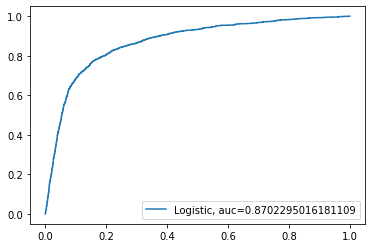

In [128]:
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
y_pred_proba = y_pred_test['predict_test_1']
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="Logistic, auc="+str(auc))
plt.legend(loc=4)
plt.show()

## Based on the above model the churning of a customer mainly depends on
* Whether the customer is reaching customer care service in the 8th month.
* Offnet use on the 8th month.The customer starts using other network services.
* international and special calls(incoming and outgoing) in 6th and 7th month.
* Incoming and outgoing calls in the 8th month from other operator.
* Total recharge made.
* 2G and 3G data used in 8th month compared to other months.
* Age on the network 

# PCA algo
* Transforming a large set of variables into a smaller one that still contains most of the information in the large set.
* Tried PCA to see the difference in results.
* Due to some information is lost, PCA result is not satisfying.

In [129]:

# Applying PCA function on training 
# and testing set of X component 
from sklearn.decomposition import PCA 
  
pca = PCA(n_components = 10) 
  
X_train = pca.fit_transform(x_train) 
X_test = pca.transform(x_test) 
  
explained_variance = pca.explained_variance_ratio_ 

In [130]:
explained_variance

array([0.35284749, 0.08694325, 0.06801151, 0.06043675, 0.05046557,
       0.04368134, 0.03397218, 0.0212094 , 0.0195373 , 0.01850492])

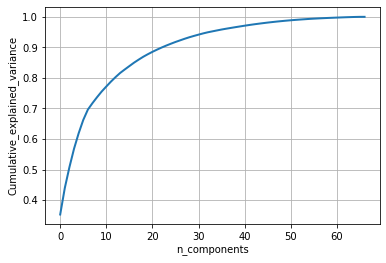

In [131]:
# PCA for dimensionality redcution (non-visualization)

pca.n_components = 67
pca_data = pca.fit_transform(x_train)

percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_);

cum_var_explained = np.cumsum(percentage_var_explained)

# Plot the PCA spectrum
plt.figure(1, figsize=(6, 4))

plt.clf()
plt.plot(cum_var_explained, linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')

plt.ylabel('Cumulative_explained_variance')
plt.show()


In [132]:
pca = PCA(n_components = 23) 
  
X_train = pca.fit_transform(x_train) 
X_test = pca.transform(x_test) 
  
explained_variance = pca.explained_variance_ratio_ 

In [133]:
X_train.shape

(37388, 23)

In [134]:
X_test.shape

(16024, 23)

## Run model on pca variables

In [142]:
logm = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
lognew= logm.fit()
lognew.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                37388
Model:                            GLM   Df Residuals:                    37365
Model Family:                Binomial   Df Model:                           22
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -18948.
Date:                Tue, 20 Oct 2020   Deviance:                       37896.
Time:                        18:39:19   Pearson chi2:                 5.05e+06
No. Iterations:                     6   Covariance Type:             nonrobust
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0537      0.013     -4.094      0.000      -0.079      -0.028
0             -3.2759      0.063    -52.379      0.000      -3.398      -3.153
1             -4.3232      0.133    -32.446      0.000      -4.584      -4.062
2             -3.7128      0.146    -25.452      0.000      -3.999      -3.427
3              1.7115      0.163     10.503      0.000       1.392       2.031
4             -9.5519      0.201    -47.572      0.000      -9.945      -9.158
5              3.9604      0.197     20.061      0.000       3.573       4.347
6              0.3218      0.222      1.447      0.148      -0.114       0.758
7             -2.8992      0.285    -10.157      0.000      -3.459      -2.340
8             -1.8072      0.280     -6.452      0.000      -2.356      -1.258
9             12.2057      0.313     39.039      0.000      11.593      12.818
10            10.3309      0.341     30.304      0.000       9.663      10.999
11             0.0727      0.357      0.204      0.838      -0.626       0.772
12           -15.0882      0.359    -42.029      0.000     -15.792     -14.385
13             2.8348      0.353      8.024      0.000       2.142       3.527
14            -3.8903      0.343    -11.350      0.000      -4.562      -3.219
15             4.9309      0.389     12.665      0.000       4.168       5.694
16             2.9183      0.365      7.993      0.000       2.203       3.634
17             3.9366      0.374     10.523      0.000       3.203       4.670
18            15.0399      0.425     35.367      0.000      14.206      15.873
19            -4.1409      0.469     -8.823      0.000      -5.061      -3.221
20            -1.0252      0.490     -2.094      0.036      -1.985      -0.066
22            -0.7734      0.448     -1.726      0.084      -1.652       0.105
==============================================================================
"""

In [143]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,22
0,0.251508,-0.095715,0.011755,0.019665,-0.077513,-0.022480,0.006606,-0.007348,-0.003100,0.015627,...,-0.021225,0.012295,-0.002051,0.001383,-0.005258,0.004732,-0.020706,0.017310,0.008114,0.000941
1,0.419806,-0.119283,-0.003523,-0.141098,-0.014818,-0.021564,0.070462,-0.025119,0.004813,0.000219,...,-0.015866,0.011014,0.017949,-0.013128,0.001928,-0.011813,-0.005244,-0.006220,0.006207,-0.017061
2,-0.152467,-0.036091,-0.067676,-0.122284,-0.024674,0.127920,-0.010359,0.070133,-0.015324,0.040931,...,0.008258,0.003430,-0.000404,-0.027210,-0.022414,0.029053,0.032112,0.000236,0.014829,-0.050295
3,0.052225,-0.007545,-0.077034,-0.007735,-0.054272,0.024892,-0.000824,-0.004305,0.003534,-0.023764,...,-0.010876,-0.003180,-0.017402,0.009134,-0.013097,0.001810,-0.009612,0.012721,-0.008489,0.006033
4,-0.141392,-0.025415,-0.025539,0.027112,-0.063592,-0.022316,-0.031324,0.014330,0.000993,0.015986,...,-0.016590,0.015253,0.012720,0.000872,-0.000148,-0.007722,-0.009279,0.000486,-0.010470,0.000843


In [144]:
y_predict_pca=lognew.predict(sm.add_constant(X_train))
y_predict_pca

0        0.633749
1        0.267508
2        0.843004
3        0.567533
4        0.825694
           ...   
37383    0.364447
37384    0.182456
37385    0.017857
37386    0.103235
37387    0.410485
Length: 37388, dtype: float64

In [145]:
# Converting y_pred to a dataframe which is an array
y_predict_pca = pd.DataFrame(y_predict_pca,columns=['predict_1'])

In [146]:
y_predict_pca['y_predict_tr']=np.where((y_predict_pca['predict_1'] < 0.5) ,0 ,1)

In [147]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_train, y_predict_pca['y_predict_tr'])
print(confusion_matrix)

[[14388  4304]
 [ 4002 14694]]


In [148]:
Accuracy_Train=((14388+14694)/(14388+14694+4002+4304)*100)
print(Accuracy_Train)

77.7843158232588


## Test

In [150]:
y_predict_pca_test=lognew.predict(X_test)
y_predict_pca_test

array([0.26509555, 0.35321539, 0.78768006, ..., 0.55270566, 0.15989359,
       0.50158076])

In [151]:
y_predict_pca_test = pd.DataFrame(y_predict_pca_test,columns=['predict_1'])

In [152]:
y_predict_pca_test['y_predict_te']=np.where((y_predict_pca_test['predict_1'] < 0.5) ,0 ,1)

In [153]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_predict_pca_test['y_predict_te'])
print(confusion_matrix)

[[3375 4639]
 [3270 4740]]


In [155]:
Accuracy_Train=((3375+4740)/(3375+4740+4639+3270)*100)
print(Accuracy_Train)

50.6427858212681


## EDA

* "1" represent Churn, "0" represent not Churn Customer.
* customer who is getting churn are using very less services as a months goes by.
* At the end of 8th month, telecom operator has to take action before customer gets churn.
* All variable in graph are giving the same Trend.

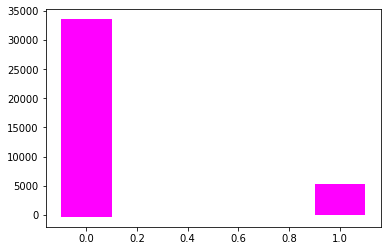

In [46]:
import matplotlib.pyplot as plt
plt.bar(main['label'],main['arpu_8'], color ='fuchsia',  width = 0.2)
plt.show()

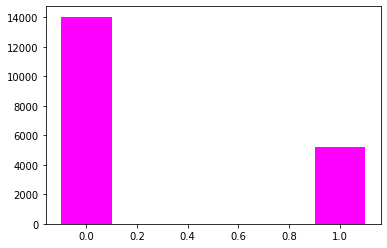

In [47]:
plt.bar(main['label'],main['total_og_mou_8'], color ='fuchsia',  width = 0.2)
plt.show()

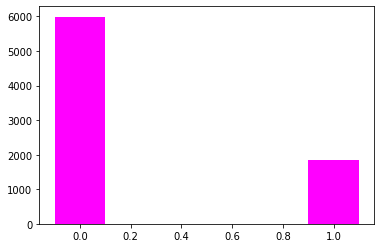

In [48]:
plt.bar(main['label'],main['total_ic_mou_8'], color ='fuchsia',  width = 0.2)
plt.show()

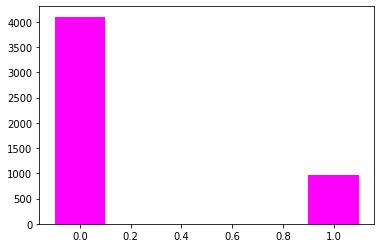

In [49]:
plt.bar(main['label'],main['isd_ic_mou_8'], color ='fuchsia',  width = 0.2)
plt.show()

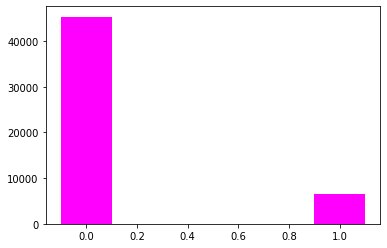

In [50]:
plt.bar(main['label'],main['total_rech_amt_8'], color ='fuchsia',  width = 0.2)
plt.show()

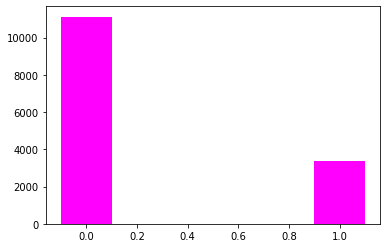

In [51]:
plt.bar(main['label'],main['vol_2g_mb_8'], color ='fuchsia',  width = 0.2)
plt.show()

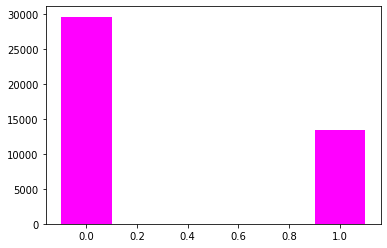

In [52]:
plt.bar(main['label'],main['vol_3g_mb_8'], color ='fuchsia',  width = 0.2)
plt.show()